In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ML2_lib import models
from ML2_lib import SGDByTorch
import torch.nn.functional as F
import torch
from sklearn.preprocessing import LabelBinarizer
from ML2_lib import format_data

In [2]:
name_path = "data/adult/adult_classification.names"
train_path = "data/adult/adult_classification.csv"
test_path = "data/adult/adult_classification.test"
hoge = format_data.Format(train_path=train_path,name_path=name_path,test_path=test_path)

In [3]:
X_train, y_train, X_test, y_test = hoge.data_return()

In [4]:
w_dim = X_train.shape[1]
class_num = int(max(y_train) + 1)
unit_num = 10
model = models.FF_L2(w_num=w_dim,c_num=class_num,unit_num=unit_num)
model.parameter_init()

In [5]:
hoge = SGDByTorch.SGDTorchCheck(lr=0.001)

In [6]:
sgd_model, loss_stack, test_loss_stack,accuracy_stack = hoge.learn(x=X_train, y=y_train, model=model,class_num=class_num,X_test=X_test,Y_test=y_test)

step : 0
OrderedDict([('fc1.weight', tensor([[ 3.4276,  1.1849, -0.9881,  ..., -1.4115, -4.8803, -2.5190],
        [ 2.5214, -2.8745,  4.0593,  ..., -1.1251, -0.1304, -4.5167],
        [ 0.1056, -4.9217, -3.5061,  ..., -1.3343, -3.7687,  0.0907],
        ...,
        [-0.1496, -1.3236,  3.7977,  ..., -4.3046,  3.0947,  3.4437],
        [-4.4637,  1.3282,  2.8949,  ..., -1.7649, -0.4766, -2.3249],
        [-0.7760, -2.7244,  0.1885,  ...,  2.6562,  4.6332,  3.6943]])), ('fc1.bias', tensor([ 0.0000, -0.0150,  0.0036, -0.0232,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0512,  0.0002])), ('fc2.weight', tensor([[-1.1894,  3.0607,  3.4040, -3.3643, -2.9182,  0.4038,  4.6545,  1.7866,
          4.9812, -4.8602],
        [-4.3076,  3.1024,  3.0956,  2.6597, -0.2515,  4.7944,  4.5956,  3.8812,
         -4.2962,  0.1094],
        [-2.1233, -1.7666,  2.5628, -1.1961,  1.5539, -1.9246,  3.1890,  1.7532,
         -3.1742, -4.5974],
        [ 4.6147,  4.8263, -1.9909,  1.3999, -4.2115, -0.0349, 

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 7000
OrderedDict([('fc1.weight', tensor([[ 3.0891e+00,  1.0833e+00, -1.6034e+00,  ..., -2.3589e+00,
         -4.8921e+00, -2.5190e+00],
        [ 2.3149e+00, -2.9421e+00,  3.6222e+00,  ..., -1.6848e+00,
         -1.3281e-01, -4.5162e+00],
        [ 5.4064e-04, -4.9677e+00, -3.7097e+00,  ..., -1.5792e+00,
         -3.7580e+00,  9.0672e-02],
        ...,
        [-3.7021e-01, -1.4094e+00,  3.2977e+00,  ..., -4.6908e+00,
          3.0904e+00,  3.4434e+00],
        [-4.7471e+00,  1.1482e+00,  2.1175e+00,  ..., -2.2576e+00,
         -4.7985e-01, -2.3242e+00],
        [-4.0619e-01, -2.5931e+00,  9.1461e-01,  ...,  3.5145e+00,
          4.6520e+00,  3.6939e+00]])), ('fc1.bias', tensor([-0.9789, -0.6795, -0.3002, -0.3868,  0.1108, -0.4060, -0.2615, -0.6684,
        -0.8167,  1.0328])), ('fc2.weight', tensor([[-1.4528,  1.7818,  3.2386, -3.3979, -3.1310, -0.3621,  4.5217,  1.2308,
          3.9673, -4.8028],
        [-4.5230,  2.3381,  2.9074,  1.7328, -0.3380,  3.5590,  4.5087,  3.7047,

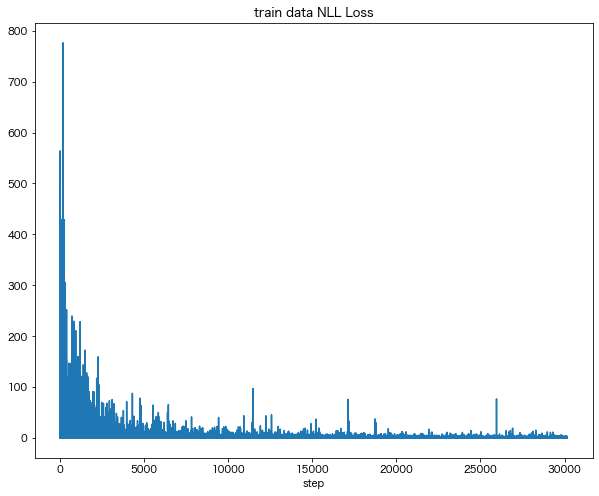

In [7]:


fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.set_title("train data NLL Loss")

ax1.plot(loss_stack)
ax1.set_xlabel("step")
plt.show()

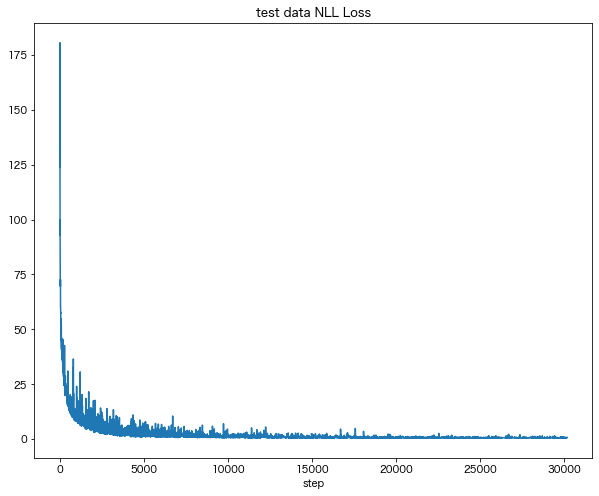

In [8]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_title("test data NLL Loss")

ax1.plot(test_loss_stack)
ax1.set_xlabel("step")
plt.show()

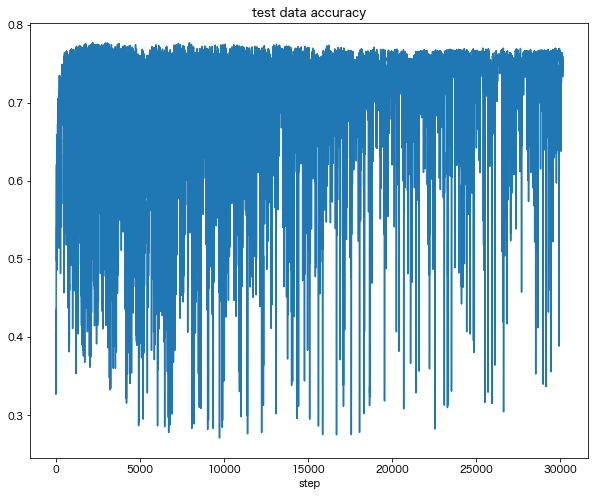

In [9]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_title("test data accuracy")

ax1.plot(accuracy_stack)
ax1.set_xlabel("step")
plt.show()

In [10]:

accuracy_stack

[0.40325365205843294,
 0.40325365205843294,
 0.40929614873837983,
 0.41706507304116863,
 0.41706507304116863,
 0.41706507304116863,
 0.41706507304116863,
 0.3956839309428951,
 0.3602257636122178,
 0.32695883134130144,
 0.32695883134130144,
 0.32695883134130144,
 0.3351261620185923,
 0.349867197875166,
 0.349867197875166,
 0.37636122177954845,
 0.40969455511288183,
 0.4346613545816733,
 0.41799468791500666,
 0.41799468791500666,
 0.43180610889774235,
 0.43180610889774235,
 0.43180610889774235,
 0.43180610889774235,
 0.41221779548472776,
 0.4403054448871182,
 0.4403054448871182,
 0.4403054448871182,
 0.44269588313413016,
 0.4807436918990704,
 0.500199203187251,
 0.5277556440903054,
 0.5659362549800797,
 0.5659362549800797,
 0.5659362549800797,
 0.5788844621513944,
 0.5788844621513944,
 0.5788844621513944,
 0.5788844621513944,
 0.5788844621513944,
 0.5845285524568393,
 0.5845285524568393,
 0.5845285524568393,
 0.5845285524568393,
 0.5845285524568393,
 0.5845285524568393,
 0.58452855245683